In [1]:
import matplotlib
import matplotlib.pyplot as plt
from preprocessing import complete_preprocessing
import seaborn as sns

/Users/manuelarns/Developer/Data-Litaracy-Project/src/preprocessing.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data['gdp_per_capita'] = (gdp_data['gdp_md_est'] / gdp_data['pop_est'] * 1000000)


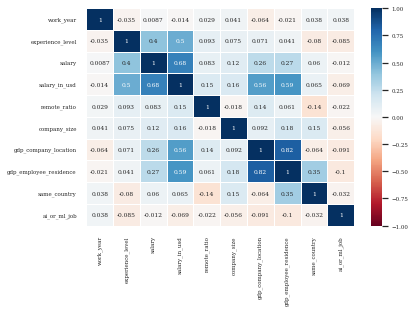

In [4]:
# load data and calculate correlation coefficients using spearman
salaries = complete_preprocessing()
correlation_coefficients = salaries.corr(method='spearman')

# plot using seaborn
sns.set(font_scale=.5)
matplotlib.rcParams['font.family'] = 'Serif'
heatmap = sns.heatmap(correlation_coefficients, annot=True, cmap='RdBu', vmin=-1, vmax=1, linewidths=.5)

plt.savefig('../doc/fig/correlations.pdf', bbox_inches='tight')